In [1]:
''' TEST
Q1- Titanic Data set:
Find survival count
'''

In [13]:
## Libraries
import pandas as pd

import sys
sys.path.append('../')

In [45]:


def solution():
    #reading from the file Titanic_train.csv
    train=pd.read_csv('res/Titanic_train.csv')
    #view the dataset
    #print(train.head())

    train.rename(columns = {'Unnamed: 0':'Index'},inplace=True)  ## Renaming index column
    #print(train.columns)
    #print(train.shape)
    #print(train.dtypes)
    #print(train.isnull().sum())
    #print(train.describe())
    train = pd.get_dummies(train, columns=['Sex','Pclass','Embarked'] )
    #print(train.head())
    print(train.columns)
    #train = train.join(dum_df)
    #print(train)
    
    '''Write your code here....
    .......
    .......
    '''
    
    sur_pclass3 = train['PassengerId'][(train["Survived"] == 1) & (train["Pclass_3"] == 1)].count()
    sur_male = train['PassengerId'][(train["Survived"] == 0) & (train["Sex_male"] == 1)].count()
    sur_south = train['PassengerId'][(train["Survived"] == 1) & (train["Embarked_S"] == 1)].count()
    
    
    # Creating a list of the answer
    result=[sur_pclass3,sur_male,sur_south]
    # NOTE: Here, 100, 200 and 300 are the answer of 1st, 2nd and 3rd question respectively. Change it accordingly.
    
    # Finally create a dataframe of the final output  and write the output to output.csv
    
    result=pd.DataFrame(result)
    # writing output to output.csv
    result.to_csv('output/output_1_1.csv', header=False, index=False)
    
solution()

Index(['Index', 'PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [46]:
'''
Q2 - Titanic Datase - Predict the age of missing passengers
'''

'\nTitanic Datase - Predict the age of missing passengers\n'

In [139]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import sys


# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sys.path.append('../')

       PassengerId    Survived      Pclass         Age       SibSp  \
count   781.000000  781.000000  781.000000  628.000000  781.000000   
mean    445.335467    0.371319    2.309859   29.603376    0.503201   
std     257.978890    0.483467    0.835904   14.427135    1.052008   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     221.000000    0.000000    2.000000   20.000000    0.000000   
50%     443.000000    0.000000    3.000000   28.000000    0.000000   
75%     671.000000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   74.000000    8.000000   

            Parch        Fare  
count  781.000000  781.000000  
mean     0.362356   30.312072  
std      0.796187   43.012711  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.108300  
75%      0.000000   30.500000  
max      6.000000  512.329200  
           Pclass    Survived         Age  GenderLabel
count  628.000000  628.000

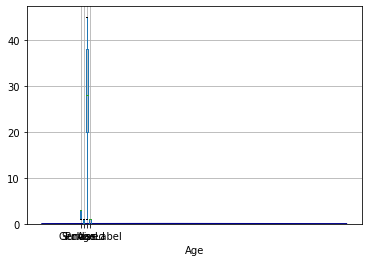

[153, 63430, 26]


In [225]:
def solution():
    result=[]
    #reading from the file Titanic_train.csv
    train=pd.read_csv('res/Titanic_train.csv')
    #view the dataset
    train.drop(columns = ['Unnamed: 0'], axis =1, inplace=True)  ## deleting unnamed column
    #print(train.head(20))
    print(train.describe())
    
    '''Write your code here....
    .......
    .......
    '''
    df = train['PassengerId'][train['Age'].isnull() == True]
    #print(df)
    null_cnt = df.count()
    result.append(null_cnt)
    #print(df.index)
    sum_idx = 0
    for i in df.index:
        #print(i)
        sum_idx += i
    
    result.append(sum_idx)
    
    #Using Label Encoder to transform Sex column in 1 and 0
    le = LabelEncoder()
    df = train[['Pclass','Survived','Sex','Age']].copy()
    df['GenderLabel']=le.fit_transform(df['Sex'])
    df.drop(columns = ['Sex'],axis =1, inplace = True)
    #print(df.describe())
    #print(df['Age'].values)
    
    df1 = df.loc[(df['Age'].isnull() == True)].copy()
    df2 = df.loc[(df['Age'].isnull() == False)].copy()
    
    
    #df2['Age'].hist(figsize=(10,10))
    #plt.show()
    
    #df2.boxplot(figsize=(10,15))
    #plt.show()
    
    sns.distplot(df2['Age'], hist=True, kde=True, color = 'darkblue')
    
    for col in ['Age']:
        percentiles = df2[col].quantile([0.01,0.85]).values #Filtering 1%(0-1), 1%(99-100) extreme outlier data
        df2[col] = np.clip(df2[col], percentiles[0], percentiles[1])
    
    #sns.distplot(df2['Age'], hist=True, kde=True, color = 'darkblue')
    print(df2.describe())
    
    df2.boxplot(figsize=(10,15))
    plt.show()
    
    
    #print(df2)
    
    #Splitting the data in test and train
    X_train = df2[['Pclass','Survived','GenderLabel']]
    X_test = df1[['Pclass','Survived','GenderLabel']]
    y_train = df2['Age']
    y_test = df1['Age']
    
    #print(X_train.shape)
    #print(X_test.shape)
    #print(y_train.shape)
    #print(y_test.shape)
    
    lr = LinearRegression()
  
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    pred_mean = int(y_pred.mean())
    
    result.append(pred_mean)
    # Creating a list of the answer
    
    # NOTE: Here, 100, 200 and 300 are the answer of 1st, 2nd and 3rd question respectively. Change it accordingly.
    
    # Finally create a dataframe of the final output  and write the output to output.csv
    print(result)
    result=pd.DataFrame(result)
    # writing output to output.csv
    result.to_csv('output/output.csv', header=False, index=False)
    
solution()

In [177]:
'''
Q3 - Titanic Datase - Classification Model
'''

'\nQ3 - Titanic Datase - Classification Model\n'

In [220]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sys


# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sys.path.append('../')

In [234]:
def solution():
    #To store the results
    result = []
    
    #reading from the file Titanic_train.csv
    train=pd.read_csv('res/Titanic_train.csv')
    #view the dataset
    train.drop(columns = ['Unnamed: 0'], axis =1, inplace=True)  ## deleting unnamed column
    #print(train.head())
    #reading Test dataset
    test = pd.read_csv('res/Titanic_test.csv')
    test.drop(columns = ['Unnamed: 0'], axis =1, inplace=True)  ## deleting unnamed column
    #print(df_Y)
    
    #print(test.describe())
    
    
    '''Write your code here....
    .......
    .......
    '''
    df_X = train[train['Age'].isnull() == False].copy()
    #print(df)
    
    df_X['AdultOrChild'] = np.where(df_X['Age'] < 18, 'Child','Adult') 
    #df['AdultOrChild'] = ['Child' if x < 18 else 'Adult' for x in df['Age']]
    #print(df)
    #Finding the total number of survived
    sur_adult_train = df_X['PassengerId'][(df_X["Survived"] == 1) & (df_X["AdultOrChild"] == 'Adult')].count()
    sur_child_train = df_X['PassengerId'][(df_X["Survived"] == 1) & (df_X["AdultOrChild"] == 'Child')].count()
    
    # for Test Data
    df_Y = test[test['Age'].isnull() == False].copy()
    #print(df)
    
    df_Y['AdultOrChild'] = np.where(df_Y['Age'] < 18, 'Child','Adult') 
    #df['AdultOrChild'] = ['Child' if x < 18 else 'Adult' for x in df['Age']]
    #print(df)
    #Finding the total number of survived
    sur_adult_test = df_Y['PassengerId'][(df_Y["Survived"] == 1) & (df_Y["AdultOrChild"] == 'Adult')].count()
    sur_child_test = df_Y['PassengerId'][(df_Y["Survived"] == 1) & (df_Y["AdultOrChild"] == 'Child')].count()
    
    Total_survived = sur_adult_train + sur_child_train + sur_adult_test + sur_child_test
    #print(Total_survived)
    result.append(Total_survived)
    
    #Classification model to predict the Survived Category
    
    le = LabelEncoder()
    #For Test Data
    df_X = df_X[['Pclass','Sex','Age','Survived']].copy()
    df_X['GenderLabel']=le.fit_transform(df_X['Sex'])
    df_X.drop(columns = ['Sex'],axis =1, inplace = True)
    df_X.rename(columns = {'GenderLabel':'Sex'},inplace=True)
    #print(df_X)
    # For Train Data
    df_Y = df_Y[['Pclass','Sex','Age','Survived']].copy()
    df_Y['GenderLabel']=le.fit_transform(df_Y['Sex'])
    df_Y.drop(columns = ['Sex'],axis =1, inplace = True)
    df_Y.rename(columns = {'GenderLabel':'Sex'},inplace=True)
    #print(df_Y)
    
    #Splitting the data in test and train
    X_train = df_X[['Pclass','Sex','Age']]
    y_train = df_X['Survived']
    X_test = df_Y[['Pclass','Sex','Age']]
    y_test = df_Y['Survived']
    
    #print(X_train.shape)
    #print(X_test.shape)
    #print(y_train.shape)
    #print(y_test.shape)
    
    #Logistic Regression for prediction
    logr = LogisticRegression()
    logr.fit(X_train, y_train)
    y_pred = logr.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    #print(confusion_matrix(y_test,y_pred))
    #print(tn, fp, fn, tp)
    37,5,12,32
    #Getting total of confusion matirx
    result.append(tn + fp + fn + tp)
    
    #Model Performance
    #acc = round(((tp+tn)/(tn + fp + fn + tp)) * 100,2)
    acc = round(accuracy_score(y_test, y_pred)*100,2)
    #print(acc,acc_2)
    result.append(acc)
    
    
    # Finally create a dataframe of the final output  and write the output to output.csv
    print(result)
    result=pd.DataFrame(result)
    # writing output to output.csv
    result.to_csv('output/output.csv', header=False, index=False)
    
solution()

[290, 86, 80.23]
